

> # CREDIT CARD FRAUD DETECTION


In [169]:
pip install catboost

In [170]:
pip install shap

In [171]:
#Importing the dependencies
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
import shap

In [172]:
import warnings
warnings.filterwarnings("ignore")

In [173]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [175]:
#Checking if there is any null values
data.isnull().values.any()

False

In [176]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x7eef98f52f50>,
 [Text(1.0999838009225849, 0.005969732649226358, 'Fraud'),
  Text(-1.0999838004750038, -0.005969815120018522, 'Normal')],
 [Text(0.5999911641395917, 0.003256217808668922, '0.2%'),
  Text(-0.5999911638954565, -0.003256262792737375, '99.8%')])

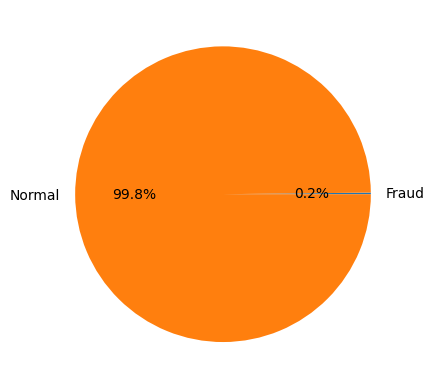

In [177]:
#Checking the proportion of normal and fraud cases
import matplotlib.pyplot as plt

labels = 'Fraud','Normal'
sizes = [ 492,284315]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

The target class in this dataset is highly skewed. Only 0.2% of the transactions are fraud, which means we can achieve 99.8% accuracy by simply predicting that every transaction is normal.

However, this accuracy is misleading, because it ignores the fraud transactions that we want to detect. Therefore,we need to sample the data and use other metrics as well which can capture the performance of our model on both classes.

Some of these metrics are: Precision, Recall, F1-score, ROC Curves and AUC!


In [178]:
# Get the Fraud and the normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [179]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [180]:
# We need to analyze information from the transaction data eg. what's the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [181]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [182]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


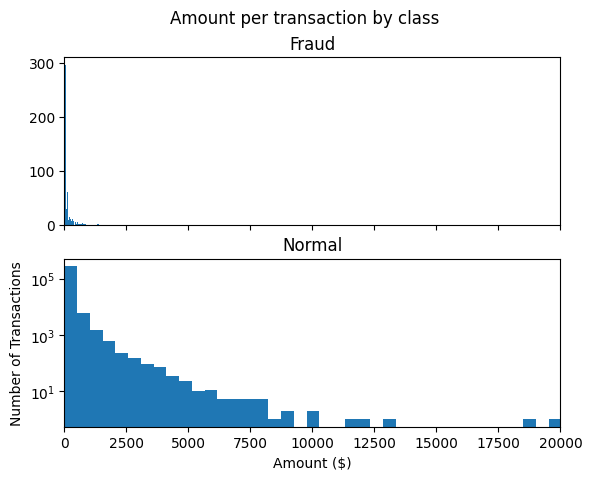

In [183]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

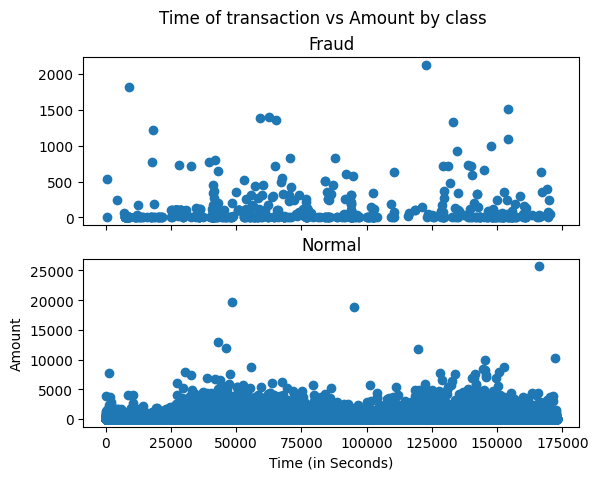

In [184]:
# We Will check if fraudulent transactions occur more often during certain timeframe?
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Taking a sample of the normal transactions,so as to balance the classes

In [185]:
normal_sample=normal.sample(n=492)

In [186]:
#row-wise concat
new_df=pd.concat([normal_sample,fraud],axis=0)

In [187]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94461.951220,0.048390,-0.028237,-0.058142,0.020959,-0.108157,-0.016584,-0.038489,0.067444,-0.061985,...,-0.043470,-0.009435,-0.043012,0.020292,-0.016007,0.015336,0.028667,0.000971,-0.018582,91.907297
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [188]:
num_cols = [col for col in new_df.columns if new_df[col].dtype != 'object']

In [189]:
X = new_df.drop('Class',axis=1)
Y = new_df['Class']

In [190]:
# Splitting the data into testing and training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#Model Training- Logistic Regression

In [191]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
print('Training Accuracy',lr.score(X_train,Y_train))
print('Testing Accuracy',lr.score(X_test,Y_test))

Training Accuracy 0.9504447268106735
Testing Accuracy 0.9390862944162437


In [192]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Accuracy score :  0.9390862944162437
Model Precision: 0.94
Model Recall: 0.92
Model F1-Score: 0.93
Model ROC: 0.94 

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.95       110
       Fraud       0.94      0.92      0.93        87

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197
 



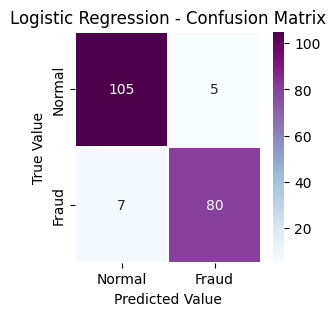

In [193]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 985it [00:58, 13.77it/s]


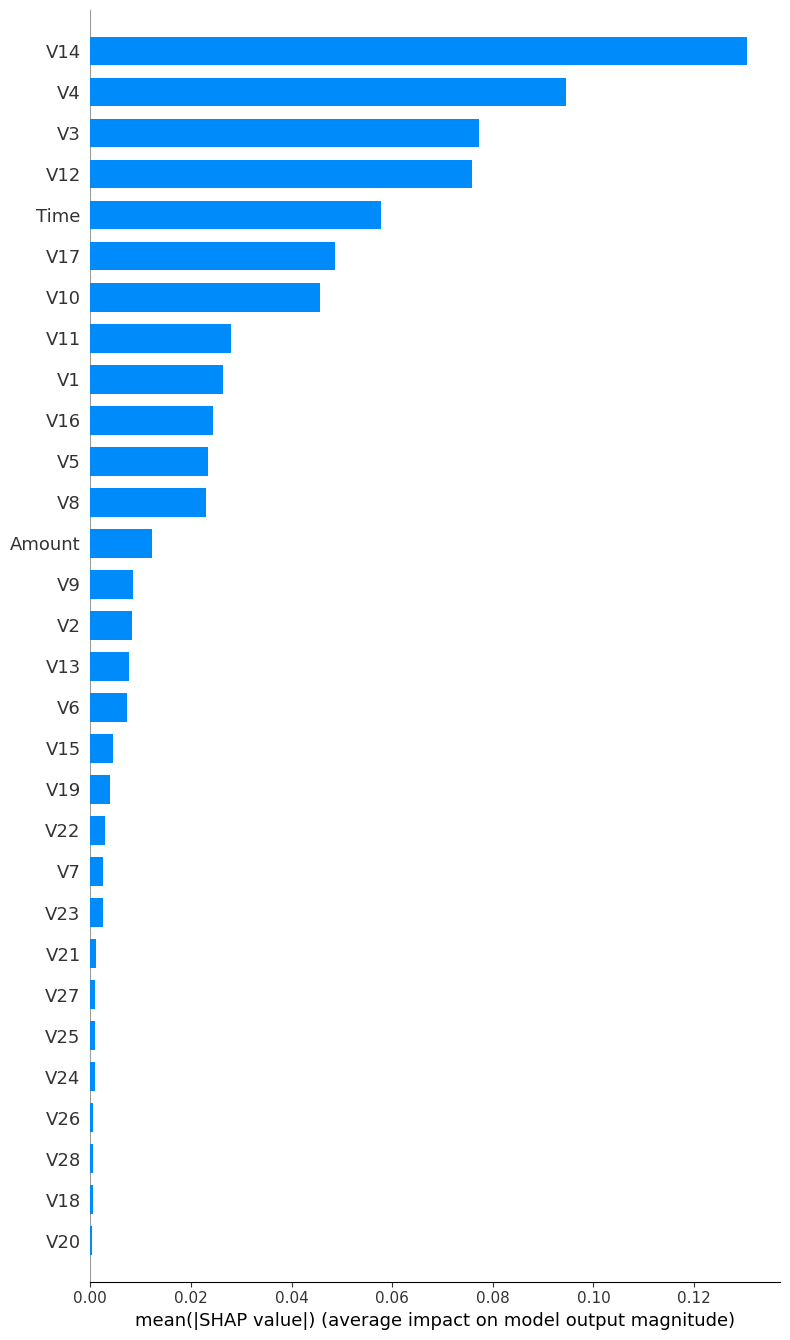

In [194]:
# Fits the explainer
explainer = shap.Explainer(lr.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

In [195]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LOGISTIC REGRESSION MODEL
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(LogisticRegression(),X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.90909091 0.91919192 0.84848485 0.93939394 0.93939394]
0.9111111111111111


# Model Training- Random Forest Classifier

In [196]:
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,Y_train)
print('Training Accuracy',rf.score(X_train,Y_train))
print('Testing Accuracy',rf.score(X_test,Y_test))
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 0.9987293519695044
Testing Accuracy 0.934010152284264


In [197]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR RANDOM FOREST CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5, test_size=0.1)
score=cross_val_score(rf,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.94949495 0.93939394 0.94949495 0.91919192 0.8989899 ]
0.9313131313131313


Accuracy score :  0.934010152284264
Model Precision: 0.93
Model Recall: 0.92
Model F1-Score: 0.92
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       110
       Fraud       0.93      0.92      0.92        87

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



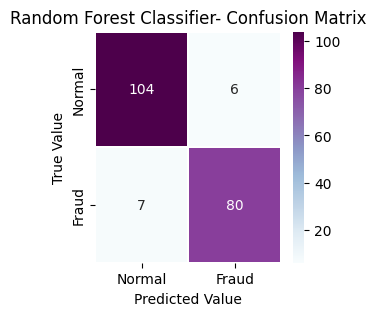

In [198]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# Model Training- Decision Tree Classifier

In [199]:
clf=DecisionTreeClassifier()

In [200]:
clf.fit(X_train,Y_train)
print('Training Accuracy',clf.score(X_train,Y_train))
print('Testing Accuracy',clf.score(X_test,Y_test))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9289340101522843


In [201]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR DECISION TREE CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5, test_size=0.1)
score=cross_val_score(clf,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.84848485 0.90909091 0.91919192 0.94949495 0.92929293]
0.9111111111111111


Accuracy score :  0.9289340101522843
Model Precision: 0.91
Model Recall: 0.93
Model F1-Score: 0.92
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.94      0.93      0.94       110
       Fraud       0.91      0.93      0.92        87

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



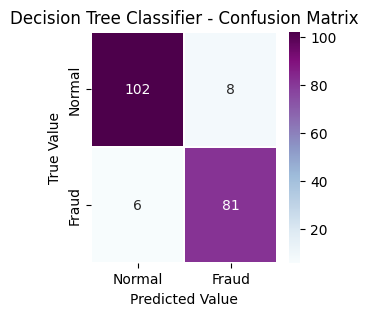

In [202]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Decision Tree Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 985it [00:15, 19.11it/s]                         


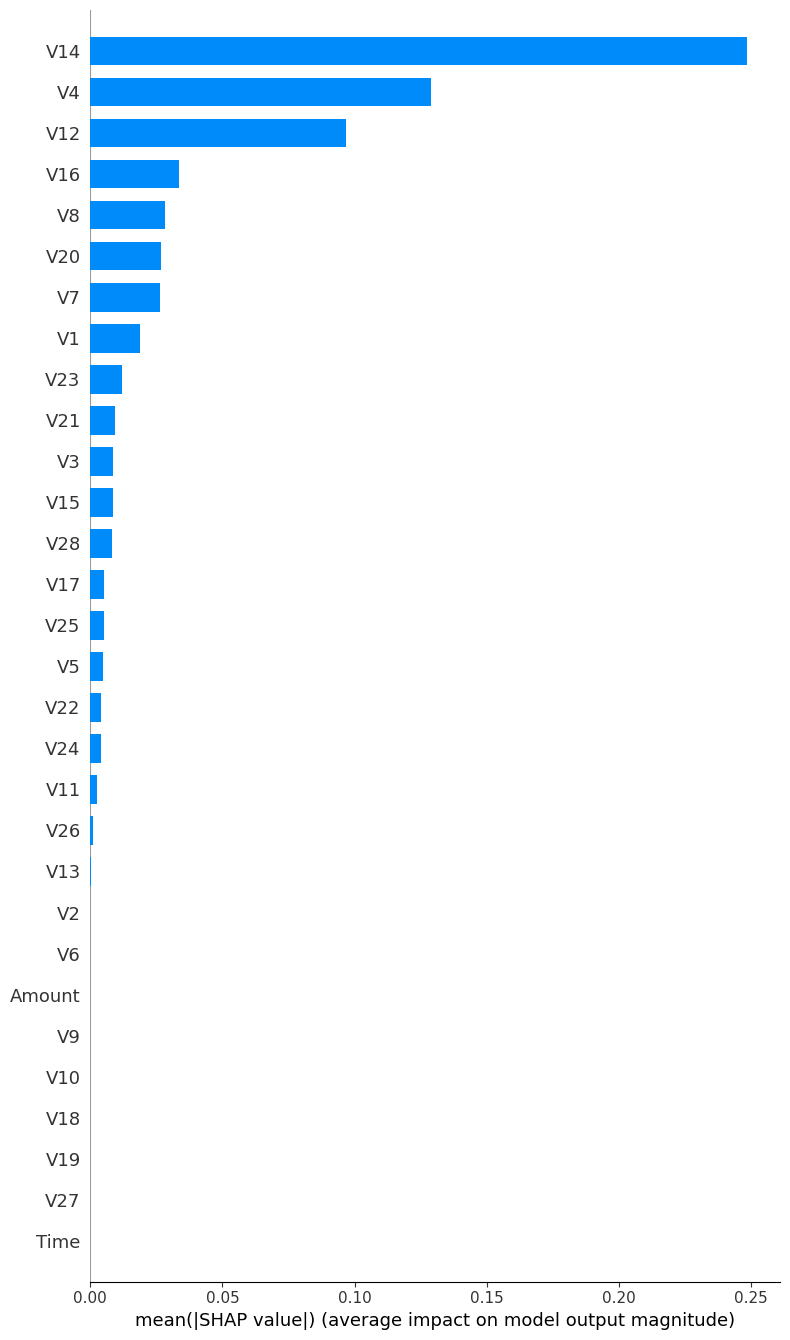

In [203]:
clf.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- Cat Boost Classifier

In [204]:
cbc=CatBoostClassifier()
cbc.fit(X_train,Y_train,eval_set=(X_test,Y_test),silent=True)

In [205]:
y_pred = cbc.predict(X_test)
accuracy = (y_pred == np.array(Y_test)).mean()
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9543147208121827


Accuracy score :  0.9543147208121827
Model Precision: 0.98
Model Recall: 0.92
Model F1-Score: 0.95
Model ROC: 0.95 

              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       110
       Fraud       0.98      0.92      0.95        87

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197
 



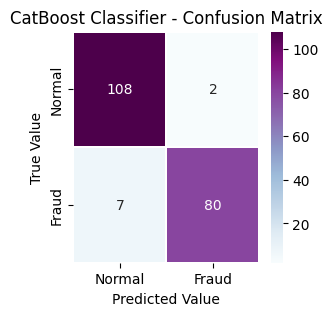

In [206]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("CatBoost Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 198it [00:19,  4.53it/s]
Permutation explainer: 985it [00:50, 15.12it/s]


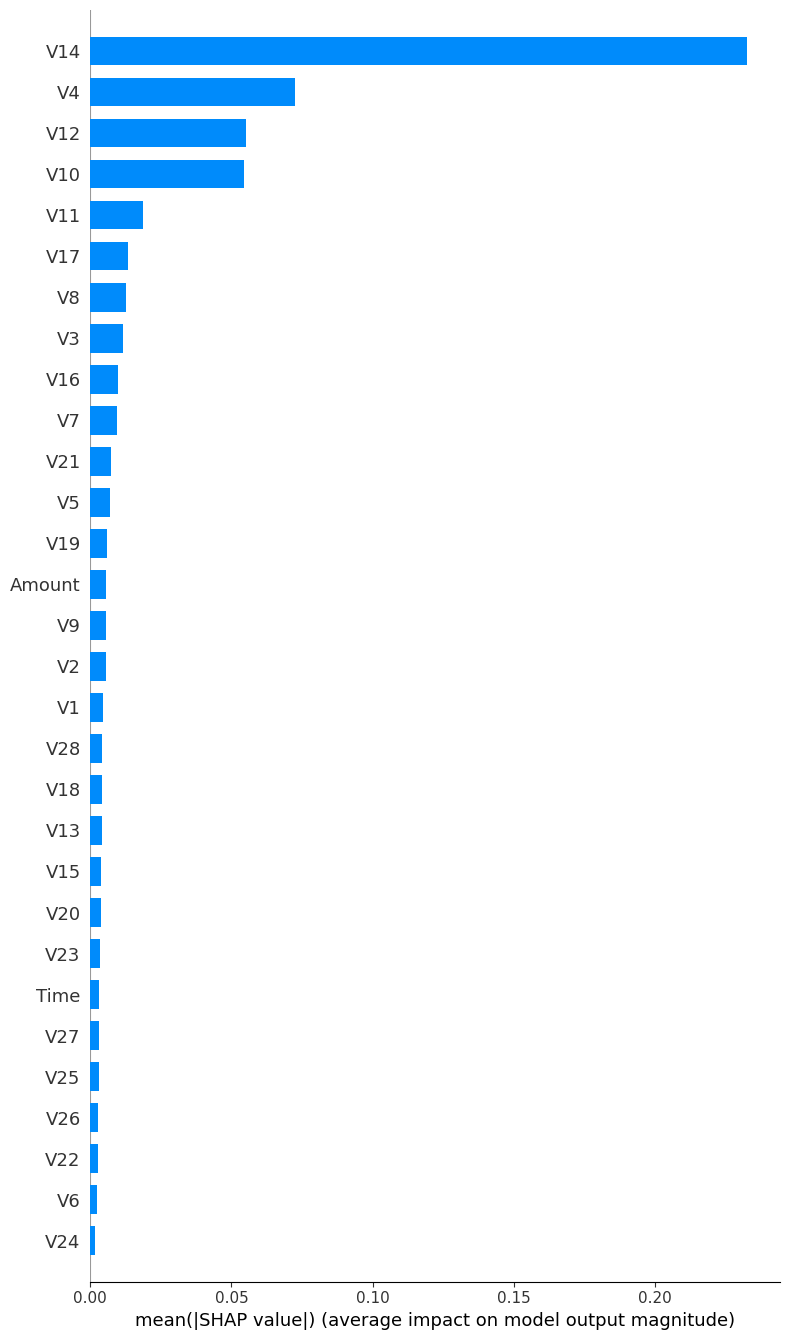

In [207]:
# Fits the explainer
explainer = shap.Explainer(cbc.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- Gradient Boosting Classifier

In [208]:
gbc=GradientBoostingClassifier()

In [209]:
gbc.fit(X_train,Y_train)
print('Training Accuracy',gbc.score(X_train,Y_train))
print('Testing Accuracy',gbc.score(X_test,Y_test))
y_pred =gbc.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9137055837563451


In [210]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR GRADIENT BOOSTING CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=4,test_size=0.1)
score=cross_val_score(gbc,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.96969697 0.92929293 0.94949495 0.94949495]
0.9494949494949495


Accuracy score :  0.9137055837563451
Model Precision: 0.9
Model Recall: 0.91
Model F1-Score: 0.9
Model ROC: 0.91 

              precision    recall  f1-score   support

      Normal       0.93      0.92      0.92       110
       Fraud       0.90      0.91      0.90        87

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197
 



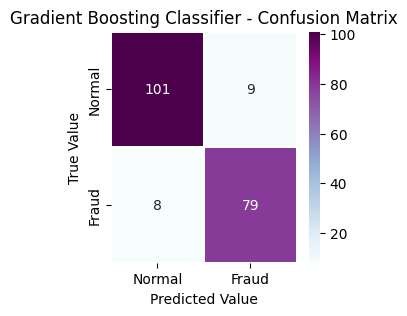

In [211]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [00:18,  4.14it/s]
Permutation explainer: 985it [00:50, 15.93it/s]                         


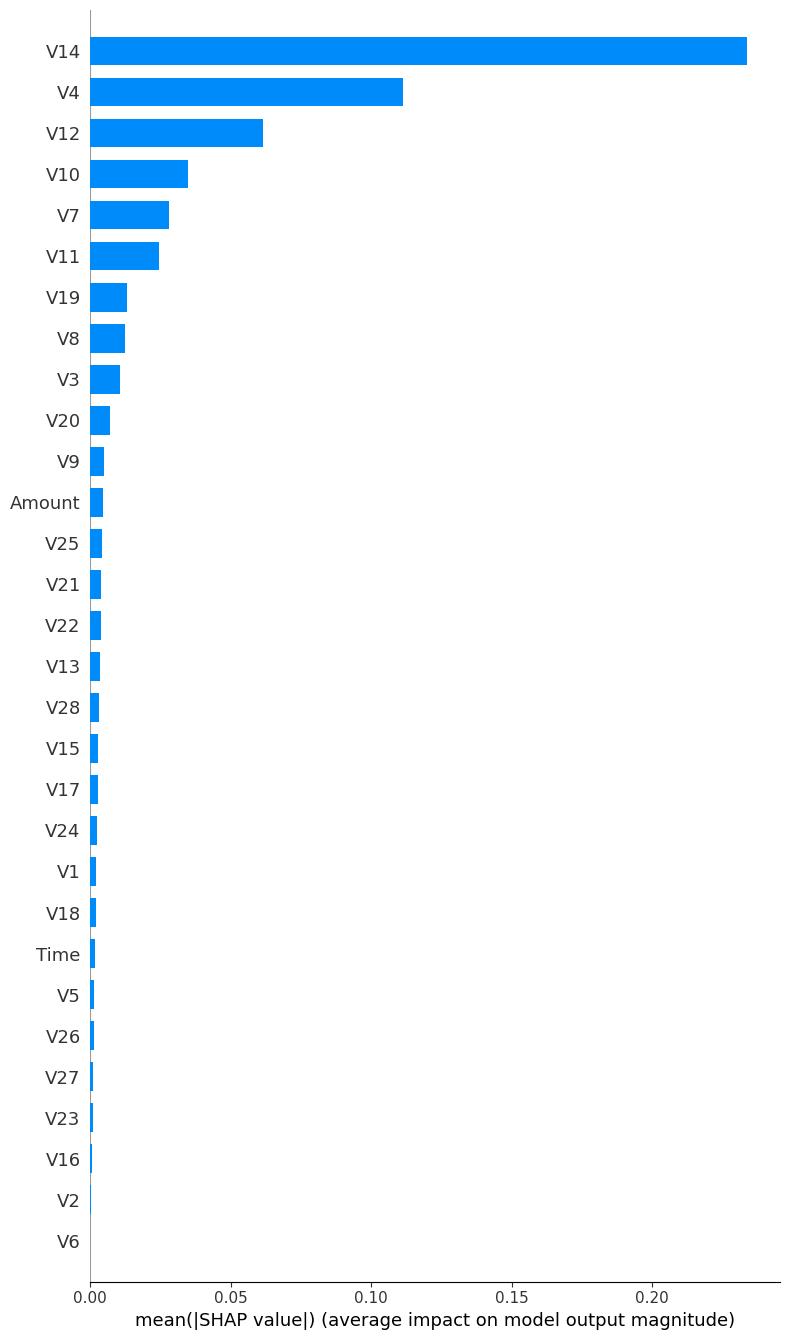

In [212]:
gbc.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(gbc.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- AdaBoost Classifier

In [213]:
adb=AdaBoostClassifier()

In [214]:
adb.fit(X_train,Y_train)
print('Training Accuracy',adb.score(X_train,Y_train))
print('Testing Accuracy',adb.score(X_test,Y_test))
y_pred =adb.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 0.9961880559085133
Testing Accuracy 0.9137055837563451


In [215]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR ADABOOST CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(adb,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.95959596 0.93939394 0.90909091 0.94949495 0.93939394]
0.9393939393939394


Accuracy score :  0.9137055837563451
Model Precision: 0.89
Model Recall: 0.92
Model F1-Score: 0.9
Model ROC: 0.91 

              precision    recall  f1-score   support

      Normal       0.93      0.91      0.92       110
       Fraud       0.89      0.92      0.90        87

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197
 



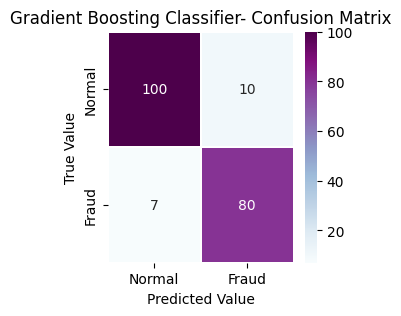

In [216]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Gradient Boosting Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [01:33,  1.89it/s]
Permutation explainer: 985it [04:25,  3.54it/s]


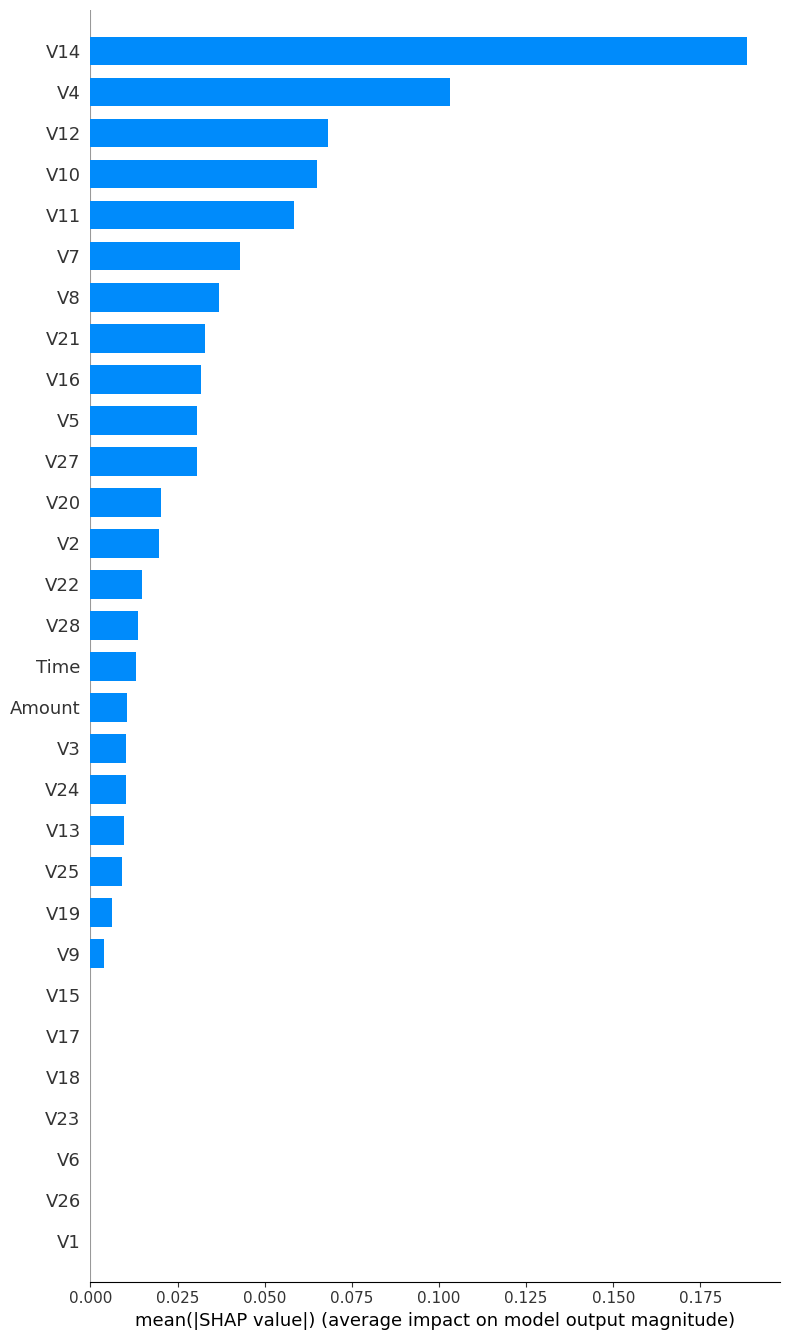

In [217]:
adb.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(adb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

#Model Training- XGB Classifier

In [218]:
xgb=XGBClassifier()
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(xgb,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.98989899 0.93939394 0.97979798 0.93939394 0.96969697]
0.9636363636363636


In [219]:
xgb.fit(X_train,Y_train)
print('Training Accuracy',xgb.score(X_train,Y_train))
print('Testing Accuracy',xgb.score(X_test,Y_test))
y_pred =xgb.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9441624365482234


Accuracy score :  0.9441624365482234
Model Precision: 0.95
Model Recall: 0.92
Model F1-Score: 0.94
Model ROC: 0.94 

              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       110
       Fraud       0.95      0.92      0.94        87

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197
 



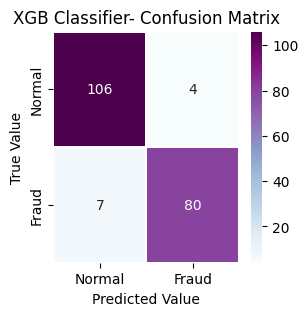

In [220]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("XGB Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [00:25,  4.83it/s]
Permutation explainer: 985it [01:09, 12.01it/s]


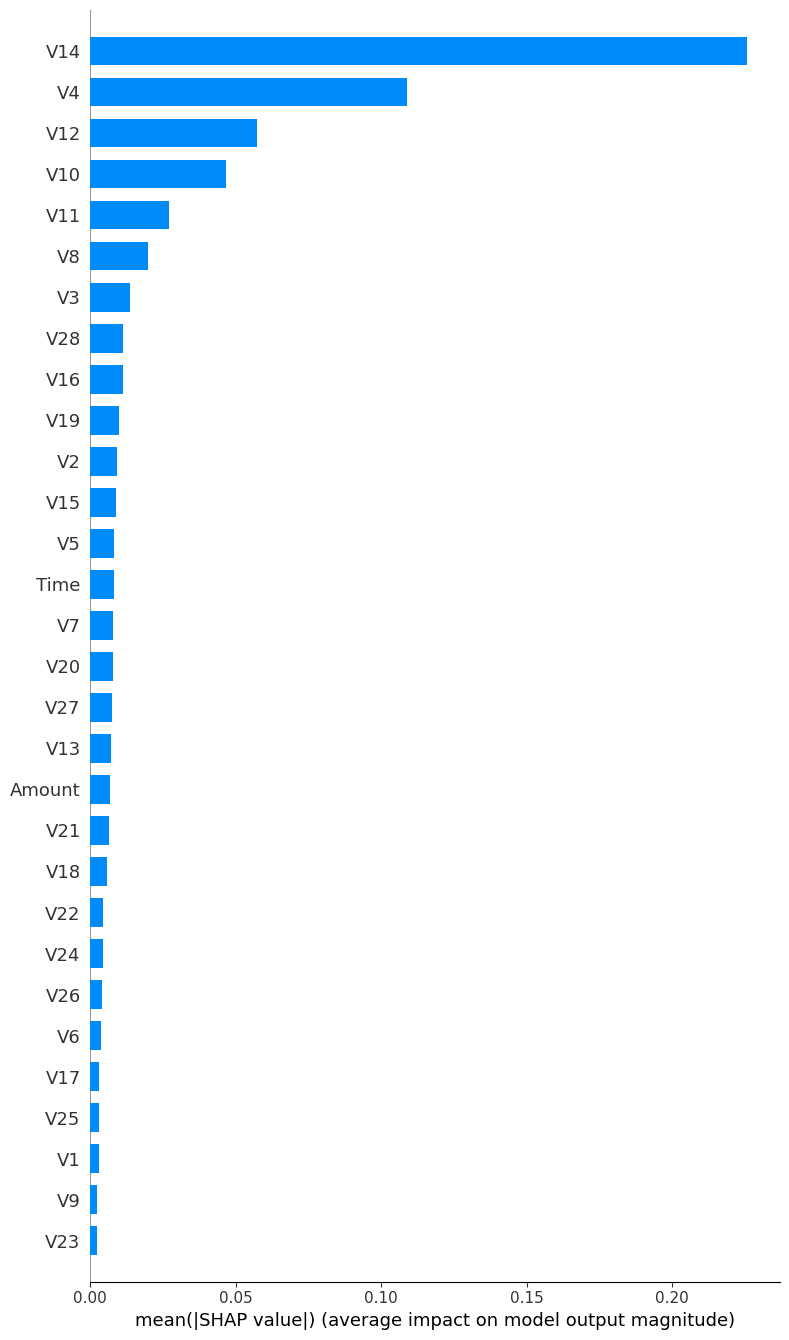

In [221]:
xgb.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

Creating a dataframe to store accuracy,precision,recall of different models(which can be used for further visualisation)

In [224]:
# Create a dictionary to store the models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=20),
    'CatBoostClassifier':CatBoostClassifier(silent=True),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()

}

# Create a list to store the results
results = []

# Loop through the models and fit them on the training data
for name, model in models.items():
   model.fit(X_train, Y_train)
   # Predict on the testing data and calculate the accuracy, precision and recall scores
   Y_pred_train = model.predict(X_train)
   Y_pred_test = model.predict(X_test)
   train_acc = accuracy_score(Y_train, Y_pred_train)
   test_acc = accuracy_score(Y_test, Y_pred_test)
   train_prec = precision_score(Y_train, Y_pred_train)
   test_prec = precision_score(Y_test, Y_pred_test)
   train_rec = recall_score(Y_train, Y_pred_train)
   test_rec = recall_score(Y_test, Y_pred_test)
   # Append the results to the list as a dictionary
   results.append({'Model': name,'Training Accuracy': train_acc,'Testing Accuracy':test_acc,
                   'Training Precision': train_prec,'Testing Precision': test_prec,
                    'Training Recall': train_rec,'Testing Recall': test_rec })

# Create a new dataframe from the results list
df_results = pd.DataFrame(results)

# Save the dataframe as a csv file
df_results.to_csv('results.csv', index=False)

# Print the dataframe
print(df_results)

                        Model  Training Accuracy  Testing Accuracy  \
0         Logistic Regression           0.950445          0.939086   
1               Decision Tree           1.000000          0.903553   
2      RandomForestClassifier           0.997459          0.923858   
3          CatBoostClassifier           1.000000          0.944162   
4  GradientBoostingClassifier           1.000000          0.913706   
5          AdaBoostClassifier           0.996188          0.913706   
6               XGBClassifier           1.000000          0.944162   

   Training Precision  Testing Precision  Training Recall  Testing Recall  
0            0.974093           0.941176         0.928395        0.919540  
1            1.000000           0.869565         1.000000        0.919540  
2            1.000000           0.961538         0.995062        0.862069  
3            1.000000           0.963415         1.000000        0.908046  
4            1.000000           0.897727         1.000000  

Creating a dataframe to store cross-validation accuracy of different models(which can be used for further visualisation/comparisions)

In [228]:
# Create a dictionary to store the models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=20),
    'CatBoostClassifier':CatBoostClassifier(silent=True),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()

}

# Create a list to store the results
results1 = []

# Loop through the models and fit them on the training data
for name, model in models.items():
    cv = ShuffleSplit(n_splits=5,test_size=0.1)
    score=cross_val_score(model,X,Y,cv=cv)
    acc=np.mean(score)
    # Append the results to the list as a dictionary
    results1.append({
        'Model': name,
        'Accuracy': acc
    })

# Create a new dataframe from the results list
df_results1 = pd.DataFrame(results1)

# Save the dataframe as a csv file
df_results1.to_csv('results1.csv', index=False)

# Print the dataframe
print(df_results1)

                        Model  Accuracy
0         Logistic Regression  0.925253
1               Decision Tree  0.894949
2      RandomForestClassifier  0.935354
3          CatBoostClassifier  0.945455
4  GradientBoostingClassifier  0.939394
5          AdaBoostClassifier  0.927273
6               XGBClassifier  0.955556
